In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

# dosya okuma
train = pd.read_csv("train.csv")
x = train['x'].values
y = train['y'].values
print(x.shape[0])

test = pd.read_csv("test.csv")
x_test = test['x'].values
y_test = test['y'].values
print(x_test.shape[0])

x_train, x_test, y_train, y_test = train_test_split(train['x'].values, train['y'].values, test_size=0.2, random_state=42)
print(x_test.shape[0])

700
300
140


# veri setini tanıyalım

Text(0, 0.5, 'y')

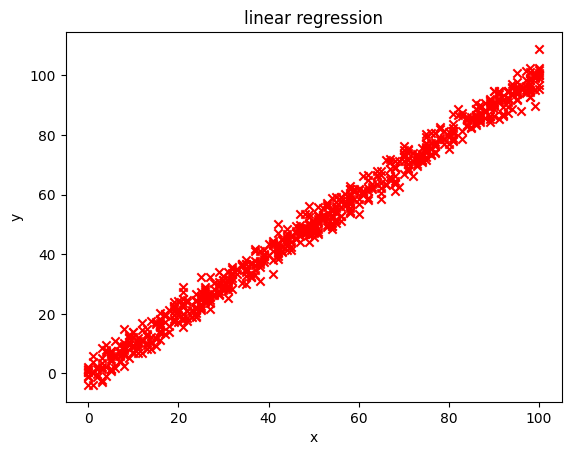

In [17]:
plt.scatter(x, y, marker="x", c="r")
plt.title("linear regression")
plt.xlabel("x")
plt.ylabel("y")


In [72]:
from sklearn.preprocessing import StandardScaler

# Veriyi normalleştir
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))

# Gradient Descent fonksiyonlarını güncelle
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

def compute_cost(x, y, w, b):
    m = len(x)
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = cost / (2 * m)
    return total_cost

def gradient_descent(x, y, w, b, alpha, epsilon, max_iter):
    J_history = []  # Maliyet geçmişini kaydedeceğiz
    for i in range(max_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = compute_cost(x, y, w, b)
        J_history.append(cost)

        if cost < epsilon:
            break

    return w, b, J_history

# Başlangıç değerlerini belirle
w_init, b_init = 0.01, 0.01
alpha = 0.0001
epsilon = 5
max_iter = 1000

# Veriyi normalize et
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))

# Gradient Descent çalıştır
w, b, J_history = gradient_descent(x_train_scaled, y_train, w_init, b_init, alpha, epsilon, max_iter)

print("w:", w)
print("b:", b)


w: [nan]
b: [nan]


In [69]:
y_pred = w * x_test + b
y_pred.shape[0]

140

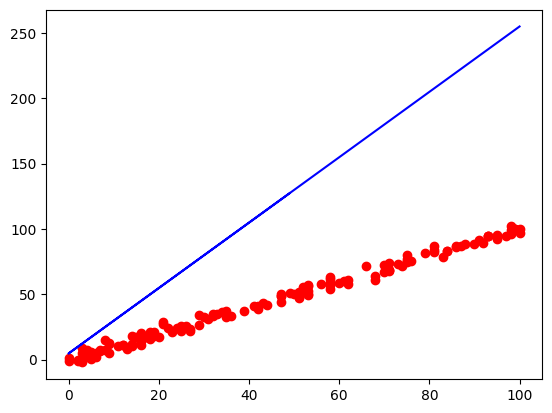

In [56]:
plt.scatter(x_test, y_test, color="r", label="Gerçek Veriler")
plt.plot(x_test, y_pred, color="b", label="Tahminler")